In [1]:
import numpy as np
import pandas as pd
import sklearn.impute , sklearn.preprocessing
import seaborn 
import matplotlib.pyplot as plt


In [2]:
data_train = pd.read_csv('./data/high_salary_train.csv').set_index('id')
data_train

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
26890,987463818.0,5066.0,3.0,state-gov,327886.0,doctorate,16.0,divorced,prof-specialty,own-child,white,male,0.0,0.0,3.0,USA,united-states,1.0
933,884327274.0,6423.0,3.0,private,99736.0,masters,14.0,divorced,prof-specialty,unmarried,white,male,4.0,0.0,3.0,USA,united-states,1.0
25596,397372044.0,9074.0,2.0,private,398575.0,some-college,10.0,never-married,tech-support,unmarried,white,female,0.0,0.0,2.0,USA,united-states,0.0
12949,580119132.0,413.0,2.0,private,682947.0,bachelors,13.0,divorced,exec-managerial,not-in-family,white,male,0.0,0.0,3.0,USA,united-states,1.0
6681,836161922.0,1790.0,1.0,private,236861.0,hs-grad,9.0,married-civ-spouse,machine-op-inspct,husband,white,male,0.0,0.0,2.0,USA,united-states,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,181655516.0,361.0,0.0,private,42706.0,some-college,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
2192,796404433.0,950.0,2.0,local-gov,103759.0,some-college,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,USA,united-states,0.0
8250,622635909.0,8689.0,0.0,private,316184.0,hs-grad,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,USA,united-states,0.0


In [3]:
data_test = pd.read_csv('./data/high_salary_test.csv').set_index('id')
data_test

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
12849,335086368.0,4170.0,1.0,private,509500.0,bachelors,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,USA,united-states,1.0
1460,732733728.0,5442.0,0.0,private,243368.0,preschool,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,MEX,mexico,0.0
13594,807579036.0,7659.0,2.0,private,144524.0,hs-grad,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,USA,united-states,0.0
14400,201637967.0,4318.0,3.0,private,150975.0,hs-grad,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,NaN,0.0,2.0,USA,united-states,0.0
14333,758267678.0,8392.0,2.0,private,136419.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21121,793510081.0,3995.0,3.0,private,48358.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states,1.0
12348,922922461.0,9297.0,2.0,private,163215.0,bachelors,13.0,divorced,exec-managerial,not-in-family,white,female,4.0,0.0,2.0,USA,united-states,1.0
22298,455309825.0,8674.0,3.0,private,196328.0,bachelors,13.0,married-civ-spouse,exec-managerial,husband,black,male,0.0,0.0,2.0,USA,united-states,0.0


In [4]:
data_live = pd.read_csv('./data/high_salary.live.csv').set_index('id')
data_live

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country
id,,,,,,,,,,,,,,,,,
6111,565712576.0,9337.0,0.0,private,287357.0,11th,7.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,USA,united-states
11214,329599477.0,6457.0,1.0,private,167558.0,hs-grad,9.0,never-married,sales,unmarried,white,female,0.0,0.0,1.0,MEX,mexico
5554,222432362.0,189.0,4.0,private,27385.0,hs-grad,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states
25131,209882990.0,2048.0,2.0,local-gov,153976.0,masters,14.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,USA,united-states
14324,936607310.0,8185.0,3.0,private,20956.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,331613078.0,6349.0,4.0,private,117898.0,bachelors,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states
8375,353499588.0,5768.0,4.0,private,298546.0,hs-grad,9.0,married-civ-spouse,farming-fishing,husband,white,male,0.0,0.0,4.0,USA,united-states
13888,604365500.0,6286.0,1.0,private,36340.0,11th,7.0,divorced,other-service,unmarried,white,female,0.0,0.0,1.0,USA,united-states


In [5]:
# Check Missing Value

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16720 entries, 26890 to 16074
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   social-security-number  16708 non-null  float64
 1   house-number            16700 non-null  float64
 2   age-group               16713 non-null  float64
 3   workclass               15873 non-null  object 
 4   fnlwgt                  16703 non-null  float64
 5   education               16704 non-null  object 
 6   education-num           16708 non-null  float64
 7   marital-status          16699 non-null  object 
 8   occupation              15875 non-null  object 
 9   relationship            16705 non-null  object 
 10  race                    16706 non-null  object 
 11  sex                     16705 non-null  object 
 12  capitalgain             16700 non-null  float64
 13  capitalloss             16706 non-null  float64
 14  hoursperweek            16701 non-null 

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4180 entries, 12849 to 5497
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   social-security-number  4178 non-null   float64
 1   house-number            4173 non-null   float64
 2   age-group               4174 non-null   float64
 3   workclass               3970 non-null   object 
 4   fnlwgt                  4174 non-null   float64
 5   education               4176 non-null   object 
 6   education-num           4178 non-null   float64
 7   marital-status          4178 non-null   object 
 8   occupation              3971 non-null   object 
 9   relationship            4174 non-null   object 
 10  race                    4172 non-null   object 
 11  sex                     4173 non-null   object 
 12  capitalgain             4177 non-null   float64
 13  capitalloss             4173 non-null   float64
 14  hoursperweek            4178 non-null   f

In [8]:
data_live.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6967 entries, 6111 to 9658
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   social-security-number  6965 non-null   float64
 1   house-number            6958 non-null   float64
 2   age-group               6954 non-null   float64
 3   workclass               6622 non-null   object 
 4   fnlwgt                  6963 non-null   float64
 5   education               6960 non-null   object 
 6   education-num           6959 non-null   float64
 7   marital-status          6958 non-null   object 
 8   occupation              6620 non-null   object 
 9   relationship            6954 non-null   object 
 10  race                    6960 non-null   object 
 11  sex                     6960 non-null   object 
 12  capitalgain             6959 non-null   float64
 13  capitalloss             6957 non-null   float64
 14  hoursperweek            6954 non-null   fl

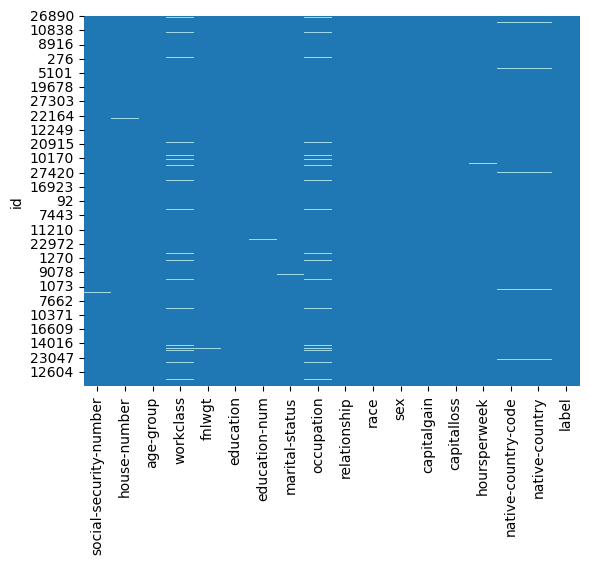

In [9]:
seaborn.heatmap(data_train.isnull(),cbar=False,cmap='tab20')
plt.show()

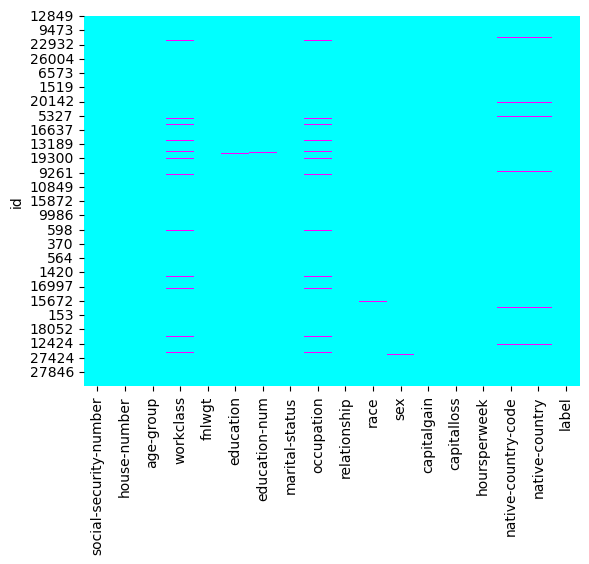

In [10]:
seaborn.heatmap(data_test.isnull(),cbar=False,cmap='cool')
plt.show()

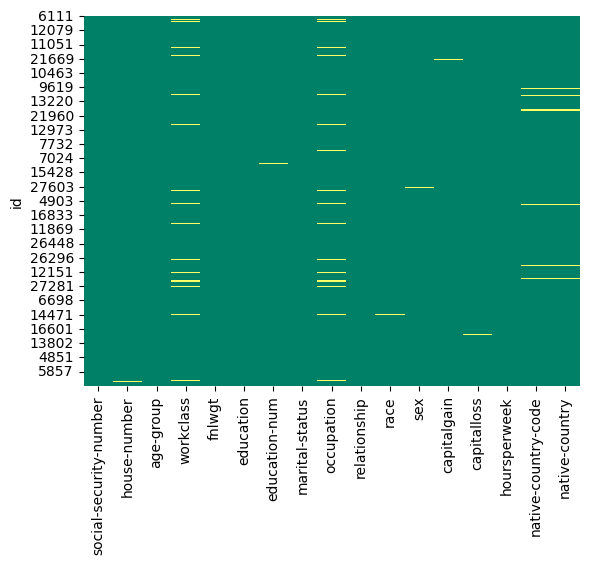

In [11]:
seaborn.heatmap(data_live.isnull(),cbar=False,cmap='summer')
plt.show()

In [12]:
#พอดูจากกราฟ ก็จะได้ข้อสรุปว่าควรจัดการ missing ยังไง แต่ขั้นตอนตอนต่อไปคือ แบ่งเป็น cat,num

In [13]:
data_train = data_train.dropna()

In [14]:
data_train.isnull().sum()

social-security-number    0
house-number              0
age-group                 0
workclass                 0
fnlwgt                    0
education                 0
education-num             0
marital-status            0
occupation                0
relationship              0
race                      0
sex                       0
capitalgain               0
capitalloss               0
hoursperweek              0
native-country-code       0
native-country            0
label                     0
dtype: int64

In [15]:
data_test = data_test.dropna()

In [16]:
data_test.isnull().sum()

social-security-number    0
house-number              0
age-group                 0
workclass                 0
fnlwgt                    0
education                 0
education-num             0
marital-status            0
occupation                0
relationship              0
race                      0
sex                       0
capitalgain               0
capitalloss               0
hoursperweek              0
native-country-code       0
native-country            0
label                     0
dtype: int64

In [17]:
ddata_live = data_live.dropna()

In [18]:
data_live.isnull().sum()

social-security-number      2
house-number                9
age-group                  13
workclass                 345
fnlwgt                      4
education                   7
education-num               8
marital-status              9
occupation                347
relationship               13
race                        7
sex                         7
capitalgain                 8
capitalloss                10
hoursperweek               13
native-country-code       122
native-country            123
dtype: int64

In [19]:
data_train['label'].value_counts()

label
0.0    8762
1.0    6590
Name: count, dtype: int64

In [20]:
data_test['label'].value_counts()

label
0.0    2175
1.0    1661
Name: count, dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
categorical_features_train = data_train.select_dtypes(include=['object', 'category']).columns
categorical_features_train

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [23]:
categorical_features_test = data_test.select_dtypes(include=['object', 'category']).columns
categorical_features_test

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [24]:
categorical_features_live = data_live.select_dtypes(include=['object', 'category']).columns
categorical_features_live

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [25]:
categorical_features_data_train = data_train[categorical_features_train]
categorical_features_data_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
26890,state-gov,doctorate,divorced,prof-specialty,own-child,white,male,USA,united-states
933,private,masters,divorced,prof-specialty,unmarried,white,male,USA,united-states
25596,private,some-college,never-married,tech-support,unmarried,white,female,USA,united-states
12949,private,bachelors,divorced,exec-managerial,not-in-family,white,male,USA,united-states
6681,private,hs-grad,married-civ-spouse,machine-op-inspct,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
8695,private,some-college,never-married,prof-specialty,not-in-family,white,male,USA,united-states
2192,local-gov,some-college,married-civ-spouse,transport-moving,husband,white,male,USA,united-states
8250,private,hs-grad,never-married,other-service,other-relative,black,male,USA,united-states


In [26]:
categorical_features_data_test = data_test[categorical_features_test]
categorical_features_data_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
12849,private,bachelors,never-married,tech-support,not-in-family,white,female,USA,united-states
1460,private,preschool,never-married,farming-fishing,not-in-family,white,male,MEX,mexico
13594,private,hs-grad,divorced,machine-op-inspct,unmarried,black,female,USA,united-states
14333,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
10595,private,bachelors,divorced,other-service,not-in-family,white,female,USA,united-states
...,...,...,...,...,...,...,...,...,...
6174,state-gov,some-college,never-married,exec-managerial,own-child,white,male,USA,united-states
21121,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
12348,private,bachelors,divorced,exec-managerial,not-in-family,white,female,USA,united-states


In [27]:
categorical_features_data_live = data_live[categorical_features_live]
categorical_features_data_live

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
6111,private,11th,married-civ-spouse,protective-serv,husband,white,male,USA,united-states
11214,private,hs-grad,never-married,sales,unmarried,white,female,MEX,mexico
5554,private,hs-grad,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
25131,local-gov,masters,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states
14324,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
25998,private,bachelors,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
8375,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,male,USA,united-states
13888,private,11th,divorced,other-service,unmarried,white,female,USA,united-states


In [28]:
categorical_impute= SimpleImputer(strategy='most_frequent')
categorical_impute

SimpleImputer(strategy='most_frequent')

In [29]:
categorical_impute.fit(categorical_features_data_train)

SimpleImputer(strategy='most_frequent')

In [30]:
categorical_features_data_train = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_train),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_train.index
)
categorical_features_data_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
26890,state-gov,doctorate,divorced,prof-specialty,own-child,white,male,USA,united-states
933,private,masters,divorced,prof-specialty,unmarried,white,male,USA,united-states
25596,private,some-college,never-married,tech-support,unmarried,white,female,USA,united-states
12949,private,bachelors,divorced,exec-managerial,not-in-family,white,male,USA,united-states
6681,private,hs-grad,married-civ-spouse,machine-op-inspct,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
8695,private,some-college,never-married,prof-specialty,not-in-family,white,male,USA,united-states
2192,local-gov,some-college,married-civ-spouse,transport-moving,husband,white,male,USA,united-states
8250,private,hs-grad,never-married,other-service,other-relative,black,male,USA,united-states


In [31]:
categorical_features_data_test = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_test),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_test.index
)
categorical_features_data_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
12849,private,bachelors,never-married,tech-support,not-in-family,white,female,USA,united-states
1460,private,preschool,never-married,farming-fishing,not-in-family,white,male,MEX,mexico
13594,private,hs-grad,divorced,machine-op-inspct,unmarried,black,female,USA,united-states
14333,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
10595,private,bachelors,divorced,other-service,not-in-family,white,female,USA,united-states
...,...,...,...,...,...,...,...,...,...
6174,state-gov,some-college,never-married,exec-managerial,own-child,white,male,USA,united-states
21121,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
12348,private,bachelors,divorced,exec-managerial,not-in-family,white,female,USA,united-states


In [32]:
categorical_features_data_live = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_live),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_live.index
)
categorical_features_data_live

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
id,,,,,,,,,
6111,private,11th,married-civ-spouse,protective-serv,husband,white,male,USA,united-states
11214,private,hs-grad,never-married,sales,unmarried,white,female,MEX,mexico
5554,private,hs-grad,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
25131,local-gov,masters,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states
14324,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
25998,private,bachelors,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
8375,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,male,USA,united-states
13888,private,11th,divorced,other-service,unmarried,white,female,USA,united-states


In [33]:
categorical_features_data_train.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

In [34]:
categorical_features_data_test.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

In [35]:
categorical_features_data_live.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

In [36]:
 numerical_features = [
    'social-security-number', 
    'house-number', 
    'age-group', 
    'fnlwgt',
    'education-num', 
    'capitalgain', 
    'capitalloss', 
    'hoursperweek',
]

In [37]:
numerical_features_data_train = data_train[numerical_features]
numerical_features_data_train

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
26890,987463818.0,5066.0,3.0,327886.0,16.0,0.0,0.0,3.0
933,884327274.0,6423.0,3.0,99736.0,14.0,4.0,0.0,3.0
25596,397372044.0,9074.0,2.0,398575.0,10.0,0.0,0.0,2.0
12949,580119132.0,413.0,2.0,682947.0,13.0,0.0,0.0,3.0
6681,836161922.0,1790.0,1.0,236861.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
8695,181655516.0,361.0,0.0,42706.0,10.0,0.0,0.0,2.0
2192,796404433.0,950.0,2.0,103759.0,10.0,2.0,0.0,2.0
8250,622635909.0,8689.0,0.0,316184.0,9.0,0.0,0.0,2.0


In [38]:
numerical_features_data_test = data_test[numerical_features]
numerical_features_data_test

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
12849,335086368.0,4170.0,1.0,509500.0,13.0,2.0,0.0,2.0
1460,732733728.0,5442.0,0.0,243368.0,1.0,0.0,0.0,3.0
13594,807579036.0,7659.0,2.0,144524.0,9.0,0.0,0.0,2.0
14333,758267678.0,8392.0,2.0,136419.0,9.0,0.0,0.0,3.0
10595,682325159.0,2298.0,2.0,84141.0,13.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...
6174,254246356.0,8902.0,0.0,48121.0,10.0,0.0,2.0,0.0
21121,793510081.0,3995.0,3.0,48358.0,9.0,0.0,0.0,2.0
12348,922922461.0,9297.0,2.0,163215.0,13.0,4.0,0.0,2.0


In [39]:
numerical_features_data_live = data_live[numerical_features]
numerical_features_data_live

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
6111,565712576.0,9337.0,0.0,287357.0,7.0,0.0,0.0,2.0
11214,329599477.0,6457.0,1.0,167558.0,9.0,0.0,0.0,1.0
5554,222432362.0,189.0,4.0,27385.0,9.0,0.0,0.0,3.0
25131,209882990.0,2048.0,2.0,153976.0,14.0,0.0,0.0,2.0
14324,936607310.0,8185.0,3.0,20956.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
25998,331613078.0,6349.0,4.0,117898.0,13.0,0.0,0.0,3.0
8375,353499588.0,5768.0,4.0,298546.0,9.0,0.0,0.0,4.0
13888,604365500.0,6286.0,1.0,36340.0,7.0,0.0,0.0,1.0


In [40]:
numerical_imputer = sklearn.impute.SimpleImputer(strategy='mean')
numerical_imputer

SimpleImputer()

In [41]:
numerical_imputer.fit(numerical_features_data_train)

SimpleImputer()

In [42]:
data_train_numerical_features = pd.DataFrame(
data = numerical_imputer.transform(numerical_features_data_train),
columns = numerical_imputer.get_feature_names_out(),
index = numerical_features_data_train.index
)
data_train_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
26890,987463818.0,5066.0,3.0,327886.0,16.0,0.0,0.0,3.0
933,884327274.0,6423.0,3.0,99736.0,14.0,4.0,0.0,3.0
25596,397372044.0,9074.0,2.0,398575.0,10.0,0.0,0.0,2.0
12949,580119132.0,413.0,2.0,682947.0,13.0,0.0,0.0,3.0
6681,836161922.0,1790.0,1.0,236861.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
8695,181655516.0,361.0,0.0,42706.0,10.0,0.0,0.0,2.0
2192,796404433.0,950.0,2.0,103759.0,10.0,2.0,0.0,2.0
8250,622635909.0,8689.0,0.0,316184.0,9.0,0.0,0.0,2.0


In [43]:
data_test_numerical_features = pd.DataFrame(
data = numerical_imputer.transform(numerical_features_data_test),
columns = numerical_imputer.get_feature_names_out(),
index = numerical_features_data_test.index
)
data_test_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
12849,335086368.0,4170.0,1.0,509500.0,13.0,2.0,0.0,2.0
1460,732733728.0,5442.0,0.0,243368.0,1.0,0.0,0.0,3.0
13594,807579036.0,7659.0,2.0,144524.0,9.0,0.0,0.0,2.0
14333,758267678.0,8392.0,2.0,136419.0,9.0,0.0,0.0,3.0
10595,682325159.0,2298.0,2.0,84141.0,13.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...
6174,254246356.0,8902.0,0.0,48121.0,10.0,0.0,2.0,0.0
21121,793510081.0,3995.0,3.0,48358.0,9.0,0.0,0.0,2.0
12348,922922461.0,9297.0,2.0,163215.0,13.0,4.0,0.0,2.0


In [44]:
data_live_numerical_features = pd.DataFrame(
data = numerical_imputer.transform(numerical_features_data_live),
columns = numerical_imputer.get_feature_names_out(),
index = numerical_features_data_live.index
)
data_live_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
6111,565712576.0,9337.0,0.0,287357.0,7.0,0.0,0.0,2.0
11214,329599477.0,6457.0,1.0,167558.0,9.0,0.0,0.0,1.0
5554,222432362.0,189.0,4.0,27385.0,9.0,0.0,0.0,3.0
25131,209882990.0,2048.0,2.0,153976.0,14.0,0.0,0.0,2.0
14324,936607310.0,8185.0,3.0,20956.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
25998,331613078.0,6349.0,4.0,117898.0,13.0,0.0,0.0,3.0
8375,353499588.0,5768.0,4.0,298546.0,9.0,0.0,0.0,4.0
13888,604365500.0,6286.0,1.0,36340.0,7.0,0.0,0.0,1.0


In [45]:
numerical_features_data_train.isna().sum(axis='index')

social-security-number    0
house-number              0
age-group                 0
fnlwgt                    0
education-num             0
capitalgain               0
capitalloss               0
hoursperweek              0
dtype: int64

In [46]:
numerical_features_data_test.isna().sum(axis='index')

social-security-number    0
house-number              0
age-group                 0
fnlwgt                    0
education-num             0
capitalgain               0
capitalloss               0
hoursperweek              0
dtype: int64

In [47]:
numerical_features_data_live.isna().sum(axis='index')

social-security-number     2
house-number               9
age-group                 13
fnlwgt                     4
education-num              8
capitalgain                8
capitalloss               10
hoursperweek              13
dtype: int64

In [48]:
label_encoder = sklearn.preprocessing.OrdinalEncoder(categories=[['0','1']])
label_encoder

OrdinalEncoder(categories=[['0', '1']])

In [49]:
label_encoder.fit(data_train[['label']])

OrdinalEncoder(categories=[['0', '1']])

In [50]:
data_train_label = pd.DataFrame(
    data    = label_encoder.transform(data_train[['label']]),
    columns = ['label'],
    index   = data_train.index
)
data_train_label

,label
id,
26890,1.0
933,1.0
25596,0.0
12949,1.0
6681,0.0
...,...
8695,0.0
2192,0.0
8250,0.0


In [51]:
data_test_label = pd.DataFrame(
    data    = label_encoder.transform(data_test[['label']]),
    columns = ['label'],
    index   = data_test.index
)
data_test_label

,label
id,
12849,1.0
1460,0.0
13594,0.0
14333,1.0
10595,0.0
...,...
6174,0.0
21121,1.0
12348,1.0


In [52]:
data_test = (
    categorical_features_data_test
    .join(numerical_features_data_test)
    .join(data_test_label)
    
)
data_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,label
id,,,,,,,,,,,,,,,,,,
12849,private,bachelors,never-married,tech-support,not-in-family,white,female,USA,united-states,335086368.0,4170.0,1.0,509500.0,13.0,2.0,0.0,2.0,1.0
1460,private,preschool,never-married,farming-fishing,not-in-family,white,male,MEX,mexico,732733728.0,5442.0,0.0,243368.0,1.0,0.0,0.0,3.0,0.0
13594,private,hs-grad,divorced,machine-op-inspct,unmarried,black,female,USA,united-states,807579036.0,7659.0,2.0,144524.0,9.0,0.0,0.0,2.0,0.0
14333,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states,758267678.0,8392.0,2.0,136419.0,9.0,0.0,0.0,3.0,1.0
10595,private,bachelors,divorced,other-service,not-in-family,white,female,USA,united-states,682325159.0,2298.0,2.0,84141.0,13.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6174,state-gov,some-college,never-married,exec-managerial,own-child,white,male,USA,united-states,254246356.0,8902.0,0.0,48121.0,10.0,0.0,2.0,0.0,0.0
21121,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states,793510081.0,3995.0,3.0,48358.0,9.0,0.0,0.0,2.0,1.0
12348,private,bachelors,divorced,exec-managerial,not-in-family,white,female,USA,united-states,922922461.0,9297.0,2.0,163215.0,13.0,4.0,0.0,2.0,1.0


In [53]:
data_train = (
    categorical_features_data_train
    .join(numerical_features_data_train)
    .join(data_train_label)
    
)
data_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,label
id,,,,,,,,,,,,,,,,,,
26890,state-gov,doctorate,divorced,prof-specialty,own-child,white,male,USA,united-states,987463818.0,5066.0,3.0,327886.0,16.0,0.0,0.0,3.0,1.0
933,private,masters,divorced,prof-specialty,unmarried,white,male,USA,united-states,884327274.0,6423.0,3.0,99736.0,14.0,4.0,0.0,3.0,1.0
25596,private,some-college,never-married,tech-support,unmarried,white,female,USA,united-states,397372044.0,9074.0,2.0,398575.0,10.0,0.0,0.0,2.0,0.0
12949,private,bachelors,divorced,exec-managerial,not-in-family,white,male,USA,united-states,580119132.0,413.0,2.0,682947.0,13.0,0.0,0.0,3.0,1.0
6681,private,hs-grad,married-civ-spouse,machine-op-inspct,husband,white,male,USA,united-states,836161922.0,1790.0,1.0,236861.0,9.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,private,some-college,never-married,prof-specialty,not-in-family,white,male,USA,united-states,181655516.0,361.0,0.0,42706.0,10.0,0.0,0.0,2.0,0.0
2192,local-gov,some-college,married-civ-spouse,transport-moving,husband,white,male,USA,united-states,796404433.0,950.0,2.0,103759.0,10.0,2.0,0.0,2.0,0.0
8250,private,hs-grad,never-married,other-service,other-relative,black,male,USA,united-states,622635909.0,8689.0,0.0,316184.0,9.0,0.0,0.0,2.0,0.0


In [54]:
data_live= (
    categorical_features_data_live
    .join(numerical_features_data_live)
    
    
)
data_live

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,,,,,,,,,,
6111,private,11th,married-civ-spouse,protective-serv,husband,white,male,USA,united-states,565712576.0,9337.0,0.0,287357.0,7.0,0.0,0.0,2.0
11214,private,hs-grad,never-married,sales,unmarried,white,female,MEX,mexico,329599477.0,6457.0,1.0,167558.0,9.0,0.0,0.0,1.0
5554,private,hs-grad,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states,222432362.0,189.0,4.0,27385.0,9.0,0.0,0.0,3.0
25131,local-gov,masters,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states,209882990.0,2048.0,2.0,153976.0,14.0,0.0,0.0,2.0
14324,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states,936607310.0,8185.0,3.0,20956.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,private,bachelors,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states,331613078.0,6349.0,4.0,117898.0,13.0,0.0,0.0,3.0
8375,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,male,USA,united-states,353499588.0,5768.0,4.0,298546.0,9.0,0.0,0.0,4.0
13888,private,11th,divorced,other-service,unmarried,white,female,USA,united-states,604365500.0,6286.0,1.0,36340.0,7.0,0.0,0.0,1.0


In [55]:
# ordinal = data_train.select_dtypes(include=['object','category']).columns
# ordinal

In [56]:
ordinal_features = [
    'workclass', 
    'education', 
    'marital-status', 
    'occupation',
    'relationship', 
    'race', 
    'sex',]

for feature in ordinal_features:
    possible_value = data_train[feature].unique()
    print(f"{feature:20s} {possible_value.size:2d} {possible_value}")


workclass             7 ['state-gov' 'private' 'self-emp-inc' 'self-emp-not-inc' 'federal-gov'
 'local-gov' 'without-pay']
education            16 ['doctorate' 'masters' 'some-college' 'bachelors' 'hs-grad' 'assoc-voc'
 'prof-school' '12th' '7th-8th' '11th' '10th' 'assoc-acdm' '9th' '5th-6th'
 '1st-4th' 'preschool']
marital-status        7 ['divorced' 'never-married' 'married-civ-spouse' 'separated' 'widowed'
 'married-spouse-absent' 'married-af-spouse']
occupation           14 ['prof-specialty' 'tech-support' 'exec-managerial' 'machine-op-inspct'
 'sales' 'handlers-cleaners' 'craft-repair' 'other-service' 'adm-clerical'
 'transport-moving' 'protective-serv' 'farming-fishing' 'priv-house-serv'
 'armed-forces']
relationship          6 ['own-child' 'unmarried' 'not-in-family' 'husband' 'wife' 'other-relative']
race                  5 ['white' 'black' 'asian-pac-islander' 'other' 'amer-indian-eskimo']
sex                   2 ['male' 'female']


In [57]:
ordinal_mapping = [
['state-gov', 'private', 'self-emp-inc', 'self-emp-not-inc', 'federal-gov',
 'local-gov', 'without-pay', 'never-worked'],
['doctorate' ,'masters', 'some-college', 'bachelors' ,'hs-grad', 'assoc-voc',
 '12th', 'prof-school', '7th-8th' ,'11th' ,'10th' ,'assoc-acdm', '9th', '5th-6th',
 '1st-4th', 'preschool'],
['divorced', 'never-married', 'married-civ-spouse', 'separated', 'widowed',
 'married-spouse-absent', 'married-af-spouse'],
['prof-specialty', 'tech-support', 'exec-managerial', 'machine-op-inspct',
 'sales' ,'handlers-cleaners' ,'craft-repair', 'other-service' ,'adm-clerical',
 'transport-moving', 'protective-serv', 'farming-fishing' ,'priv-house-serv',
 'armed-forces'],
['own-child', 'unmarried' ,'not-in-family' ,'husband' ,'wife', 'other-relative'],
['white', 'black' ,'asian-pac-islander', 'other', 'amer-indian-eskimo'],
['male', 'female'],
]

In [58]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder(categories=ordinal_mapping)
ordinal_encoder

OrdinalEncoder(categories=[['state-gov', 'private', 'self-emp-inc',
                            'self-emp-not-inc', 'federal-gov', 'local-gov',
                            'without-pay', 'never-worked'],
                           ['doctorate', 'masters', 'some-college', 'bachelors',
                            'hs-grad', 'assoc-voc', '12th', 'prof-school',
                            '7th-8th', '11th', '10th', 'assoc-acdm', '9th',
                            '5th-6th', '1st-4th', 'preschool'],
                           ['divorced', 'never-married', 'married-civ-...
                           ['prof-specialty', 'tech-support', 'exec-managerial',
                            'machine-op-inspct', 'sales', 'handlers-cleaners',
                            'craft-repair', 'other-service', 'adm-clerical',
                            'transport-moving', 'protective-serv',
                            'farming-fishing', 'priv-house-serv',
                            'armed-forces'],
                           ['own-child', 'unmarried', 'not-in-family',
                            'husband', 'wife', 'other-relative'],
                           ['white', 'black', 'asian-pac-islander', 'other',
                            'amer-indian-eskimo'],
                           ['male', 'female']])

In [59]:
 ordinal_encoder.fit(
    X = data_train[ordinal_features]
)

OrdinalEncoder(categories=[['state-gov', 'private', 'self-emp-inc',
                            'self-emp-not-inc', 'federal-gov', 'local-gov',
                            'without-pay', 'never-worked'],
                           ['doctorate', 'masters', 'some-college', 'bachelors',
                            'hs-grad', 'assoc-voc', '12th', 'prof-school',
                            '7th-8th', '11th', '10th', 'assoc-acdm', '9th',
                            '5th-6th', '1st-4th', 'preschool'],
                           ['divorced', 'never-married', 'married-civ-...
                           ['prof-specialty', 'tech-support', 'exec-managerial',
                            'machine-op-inspct', 'sales', 'handlers-cleaners',
                            'craft-repair', 'other-service', 'adm-clerical',
                            'transport-moving', 'protective-serv',
                            'farming-fishing', 'priv-house-serv',
                            'armed-forces'],
                           ['own-child', 'unmarried', 'not-in-family',
                            'husband', 'wife', 'other-relative'],
                           ['white', 'black', 'asian-pac-islander', 'other',
                            'amer-indian-eskimo'],
                           ['male', 'female']])

In [60]:
data_train_ordinal_features = pd.DataFrame(
data = ordinal_encoder.transform(data_train[ordinal_features]),
columns = ordinal_encoder.get_feature_names_out(),
index = data_train.index
)
data_train_ordinal_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
26890,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,1.0,1.0,0.0,0.0,1.0,0.0,0.0
25596,1.0,2.0,1.0,1.0,1.0,0.0,1.0
12949,1.0,3.0,0.0,2.0,2.0,0.0,0.0
6681,1.0,4.0,2.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...
8695,1.0,2.0,1.0,0.0,2.0,0.0,0.0
2192,5.0,2.0,2.0,9.0,3.0,0.0,0.0
8250,1.0,4.0,1.0,7.0,5.0,1.0,0.0


In [61]:
data_test_ordinal_features = pd.DataFrame(
data = ordinal_encoder.transform(data_test[ordinal_features]),
columns = ordinal_encoder.get_feature_names_out(),
index = data_test.index
)
data_test_ordinal_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
12849,1.0,3.0,1.0,1.0,2.0,0.0,1.0
1460,1.0,15.0,1.0,11.0,2.0,0.0,0.0
13594,1.0,4.0,0.0,3.0,1.0,1.0,1.0
14333,1.0,4.0,2.0,6.0,3.0,0.0,0.0
10595,1.0,3.0,0.0,7.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...
6174,0.0,2.0,1.0,2.0,0.0,0.0,0.0
21121,1.0,4.0,2.0,6.0,3.0,0.0,0.0
12348,1.0,3.0,0.0,2.0,2.0,0.0,1.0


In [62]:
data_live_ordinal_features = pd.DataFrame(
data = ordinal_encoder.transform(data_live[ordinal_features]),
columns = ordinal_encoder.get_feature_names_out(),
index = data_live.index
)
data_live_ordinal_features

,workclass,education,marital-status,occupation,relationship,race,sex
id,,,,,,,
6111,1.0,9.0,2.0,10.0,3.0,0.0,0.0
11214,1.0,4.0,1.0,4.0,1.0,0.0,1.0
5554,1.0,4.0,2.0,2.0,3.0,0.0,0.0
25131,5.0,1.0,2.0,0.0,3.0,0.0,0.0
14324,1.0,4.0,2.0,6.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...
25998,1.0,3.0,2.0,2.0,3.0,0.0,0.0
8375,1.0,4.0,2.0,11.0,3.0,0.0,0.0
13888,1.0,9.0,0.0,7.0,1.0,0.0,1.0


In [63]:
# nominal = data_train.select_dtypes(include=['object','category']).columns
# nominal

In [64]:
nominal_features = [
    'workclass', 
    'education', 
    'marital-status', 
    'occupation',
    'relationship', 
    'race', 
    'sex', 
    'native-country-code', 
    'native-country']
nominal_features
for feature in nominal_features:
    possible_value = data_train[feature].unique()
    print(f"{feature:20s} {possible_value.size:2d} {possible_value}")


workclass             7 ['state-gov' 'private' 'self-emp-inc' 'self-emp-not-inc' 'federal-gov'
 'local-gov' 'without-pay']
education            16 ['doctorate' 'masters' 'some-college' 'bachelors' 'hs-grad' 'assoc-voc'
 'prof-school' '12th' '7th-8th' '11th' '10th' 'assoc-acdm' '9th' '5th-6th'
 '1st-4th' 'preschool']
marital-status        7 ['divorced' 'never-married' 'married-civ-spouse' 'separated' 'widowed'
 'married-spouse-absent' 'married-af-spouse']
occupation           14 ['prof-specialty' 'tech-support' 'exec-managerial' 'machine-op-inspct'
 'sales' 'handlers-cleaners' 'craft-repair' 'other-service' 'adm-clerical'
 'transport-moving' 'protective-serv' 'farming-fishing' 'priv-house-serv'
 'armed-forces']
relationship          6 ['own-child' 'unmarried' 'not-in-family' 'husband' 'wife' 'other-relative']
race                  5 ['white' 'black' 'asian-pac-islander' 'other' 'amer-indian-eskimo']
sex                   2 ['male' 'female']
native-country-code  40 ['USA' 'HTI' 'GRC' 'ZA

In [65]:
nominal_mapping = [
    # workclass
    ['state-gov', 'private', 'self-emp-inc', 'self-emp-not-inc', 'federal-gov',
     'local-gov', 'without-pay', 'never-worked'],
    # education
    ['doctorate', 'masters', 'some-college', 'bachelors', 'hs-grad', 'assoc-voc',
     '12th', 'prof-school', '7th-8th', '11th', '10th', 'assoc-acdm', '9th', '5th-6th',
     '1st-4th', 'preschool'],
    # marital-status
    ['divorced', 'never-married', 'married-civ-spouse', 'separated', 'widowed',
     'married-spouse-absent', 'married-af-spouse'],
    # occupation
    ['prof-specialty', 'tech-support', 'exec-managerial', 'machine-op-inspct',
     'sales', 'handlers-cleaners', 'craft-repair', 'other-service', 'adm-clerical',
     'transport-moving', 'protective-serv', 'farming-fishing', 'priv-house-serv',
     'armed-forces'],
    # relationship
    ['own-child', 'unmarried', 'not-in-family', 'husband', 'wife', 'other-relative'],
    # race
    ['white', 'black', 'asian-pac-islander', 'other', 'amer-indian-eskimo'],
    # sex
    ['male', 'female'],
    # native-country-code
['USA', 'HTI', 'GRC', 'ZAF', 'IND', 'CHN', 'LAO', 'JPN', 'PHL', 'COL', 'VNM', 'PRI',
 'YUG', 'CUB', 'DUE', 'ITA', 'TWN', 'SLV', 'JAM', 'CAN', 'MEX', 'PRT', 'IRN', 'GBR',
 'POL', 'GTM', 'KHM', 'PER', 'ECU', 'DOM', 'HUN', 'TTO', 'IRL', 'FRA', 'UMI', 'HKG',
 'NIC', 'HND', 'THA', 'NLD'],
# native-country
['united-states', 'haiti', 'greece', 'south', 'india', 'china', 'laos', 'japan',
 'philippines', 'columbia', 'vietnam', 'puerto-rico', 'yugoslavia', 'cuba',
 'germany', 'italy', 'taiwan', 'el-salvador', 'jamaica', 'canada', 'mexico',
 'portugal', 'iran', 'england', 'poland', 'guatemala', 'cambodia', 'peru',
 'ecuador', 'dominican-republic', 'hungary', 'trinadad&tobago', 'ireland',
 'france', 'outlying-us(guam-usvi-etc)', 'hong', 'nicaragua', 'honduras',
 'thailand', 'holand-netherlands', 'scotland']

]

In [66]:
print(data_train['native-country'].unique())

['united-states' 'haiti' 'greece' 'south' 'india' 'china' 'laos' 'japan'
 'philippines' 'columbia' 'vietnam' 'puerto-rico' 'yugoslavia' 'cuba'
 'germany' 'italy' 'taiwan' 'el-salvador' 'jamaica' 'canada' 'mexico'
 'iran' 'england' 'poland' 'guatemala' 'portugal' 'cambodia' 'peru'
 'ecuador' 'dominican-republic' 'hungary' 'trinadad&tobago' 'ireland'
 'france' 'hong' 'nicaragua' 'outlying-us(guam-usvi-etc)' 'thailand'
 'holand-netherlands' 'scotland' 'honduras']


In [67]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(categories=nominal_mapping, sparse_output=False)
onehot_encoder

OneHotEncoder(categories=[['state-gov', 'private', 'self-emp-inc',
                           'self-emp-not-inc', 'federal-gov', 'local-gov',
                           'without-pay', 'never-worked'],
                          ['doctorate', 'masters', 'some-college', 'bachelors',
                           'hs-grad', 'assoc-voc', '12th', 'prof-school',
                           '7th-8th', '11th', '10th', 'assoc-acdm', '9th',
                           '5th-6th', '1st-4th', 'preschool'],
                          ['divorced', 'never-married', 'married-civ-s...
                           'ECU', 'DOM', ...],
                          ['united-states', 'haiti', 'greece', 'south', 'india',
                           'china', 'laos', 'japan', 'philippines', 'columbia',
                           'vietnam', 'puerto-rico', 'yugoslavia', 'cuba',
                           'germany', 'italy', 'taiwan', 'el-salvador',
                           'jamaica', 'canada', 'mexico', 'portugal', 'iran',
                           'england', 'poland', 'guatemala', 'cambodia', 'peru',
                           'ecuador', 'dominican-republic', ...]],
              sparse_output=False)

In [68]:
onehot_encoder.fit(
    X=data_train[nominal_features]
)

OneHotEncoder(categories=[['state-gov', 'private', 'self-emp-inc',
                           'self-emp-not-inc', 'federal-gov', 'local-gov',
                           'without-pay', 'never-worked'],
                          ['doctorate', 'masters', 'some-college', 'bachelors',
                           'hs-grad', 'assoc-voc', '12th', 'prof-school',
                           '7th-8th', '11th', '10th', 'assoc-acdm', '9th',
                           '5th-6th', '1st-4th', 'preschool'],
                          ['divorced', 'never-married', 'married-civ-s...
                           'ECU', 'DOM', ...],
                          ['united-states', 'haiti', 'greece', 'south', 'india',
                           'china', 'laos', 'japan', 'philippines', 'columbia',
                           'vietnam', 'puerto-rico', 'yugoslavia', 'cuba',
                           'germany', 'italy', 'taiwan', 'el-salvador',
                           'jamaica', 'canada', 'mexico', 'portugal', 'iran',
                           'england', 'poland', 'guatemala', 'cambodia', 'peru',
                           'ecuador', 'dominican-republic', ...]],
              sparse_output=False)

In [69]:
onehot_encoder.get_feature_names_out()

array(['workclass_state-gov', 'workclass_private',
       'workclass_self-emp-inc', 'workclass_self-emp-not-inc',
       'workclass_federal-gov', 'workclass_local-gov',
       'workclass_without-pay', 'workclass_never-worked',
       'education_doctorate', 'education_masters',
       'education_some-college', 'education_bachelors',
       'education_hs-grad', 'education_assoc-voc', 'education_12th',
       'education_prof-school', 'education_7th-8th', 'education_11th',
       'education_10th', 'education_assoc-acdm', 'education_9th',
       'education_5th-6th', 'education_1st-4th', 'education_preschool',
       'marital-status_divorced', 'marital-status_never-married',
       'marital-status_married-civ-spouse', 'marital-status_separated',
       'marital-status_widowed', 'marital-status_married-spouse-absent',
       'marital-status_married-af-spouse', 'occupation_prof-specialty',
       'occupation_tech-support', 'occupation_exec-managerial',
       'occupation_machine-op-inspct', 'o

In [70]:
 data_train_nominal_features = pd.DataFrame(
data = onehot_encoder.transform(data_train[nominal_features]),
columns = onehot_encoder.get_feature_names_out(),
index = data_train.index
)
data_train_nominal_features

,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_federal-gov,workclass_local-gov,workclass_without-pay,workclass_never-worked,education_doctorate,education_masters,...,native-country_trinadad&tobago,native-country_ireland,native-country_france,native-country_outlying-us(guam-usvi-etc),native-country_hong,native-country_nicaragua,native-country_honduras,native-country_thailand,native-country_holand-netherlands,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
26890,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25596,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12949,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6681,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2192,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
data_test_nominal_features = pd.DataFrame(
data = onehot_encoder.transform(data_test[nominal_features]),
columns = onehot_encoder.get_feature_names_out(),
index = data_test.index
)
data_test_nominal_features

,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_federal-gov,workclass_local-gov,workclass_without-pay,workclass_never-worked,education_doctorate,education_masters,...,native-country_trinadad&tobago,native-country_ireland,native-country_france,native-country_outlying-us(guam-usvi-etc),native-country_hong,native-country_nicaragua,native-country_honduras,native-country_thailand,native-country_holand-netherlands,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
12849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10595,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6174,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21121,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
 data_live_nominal_features = pd.DataFrame(
data = onehot_encoder.transform(data_live[nominal_features]),
columns = onehot_encoder.get_feature_names_out(),
index = data_live.index
)
data_live_nominal_features

,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_federal-gov,workclass_local-gov,workclass_without-pay,workclass_never-worked,education_doctorate,education_masters,...,native-country_trinadad&tobago,native-country_ireland,native-country_france,native-country_outlying-us(guam-usvi-etc),native-country_hong,native-country_nicaragua,native-country_honduras,native-country_thailand,native-country_holand-netherlands,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
6111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25131,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler

StandardScaler()

In [74]:
standard_scaler.fit(data_train[numerical_features])

StandardScaler()

In [75]:
data_train_numerical_features = pd.DataFrame(
data = standard_scaler.transform(data_train[numerical_features]),
columns = standard_scaler.get_feature_names_out(),
index = data_train_numerical_features.index
)
data_train_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
26890,1.676806,0.010066,0.889085,1.327530,2.151965,-0.329532,-0.23238,1.083594
933,1.279450,0.485531,0.889085,-0.866107,1.374304,3.898612,-0.23238,1.083594
25596,-0.596648,1.414386,0.073231,2.007197,-0.181017,-0.329532,-0.23238,-0.096050
12949,0.107424,-1.620247,0.073231,4.741403,0.985474,-0.329532,-0.23238,1.083594
6681,1.093883,-1.137775,-0.742622,0.452335,-0.569847,-0.329532,-0.23238,-0.096050
...,...,...,...,...,...,...,...,...
8695,-1.427742,-1.638467,-1.558476,-1.414445,-0.181017,-0.329532,-0.23238,-0.096050
2192,0.940709,-1.432094,0.073231,-0.827427,-0.181017,1.784540,-0.23238,-0.096050
8250,0.271229,1.279490,-1.558476,1.215017,-0.569847,-0.329532,-0.23238,-0.096050


In [76]:
data_test_numerical_features = pd.DataFrame(
data = standard_scaler.transform(data_test[numerical_features]),
columns = standard_scaler.get_feature_names_out(),
index = data_test_numerical_features.index
)
data_test_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
12849,-0.836617,-0.303873,-0.742622,3.073729,0.985474,1.784540,-0.232380,-0.096050
1460,0.695404,0.141809,-1.558476,0.514899,-3.680490,-0.329532,-0.232380,1.083594
13594,0.983761,0.918599,0.073231,-0.435475,-0.569847,-0.329532,-0.232380,-0.096050
14333,0.793779,1.175427,0.073231,-0.513404,-0.569847,-0.329532,-0.232380,1.083594
10595,0.501194,-0.959783,0.073231,-1.016051,0.985474,-0.329532,-0.232380,2.263238
...,...,...,...,...,...,...,...,...
6174,-1.148070,1.354120,-1.558476,-1.362380,-0.181017,-0.329532,2.902508,-2.455338
21121,0.929558,-0.365189,0.889085,-1.360101,-0.569847,-0.329532,-0.232380,-0.096050
12348,1.428146,1.492520,0.073231,-0.255764,0.985474,3.898612,-0.232380,-0.096050


In [77]:
data_live_numerical_features = pd.DataFrame(
data = standard_scaler.transform(data_live[numerical_features]),
columns = standard_scaler.get_feature_names_out(),
index = data_live_numerical_features.index
)
data_live_numerical_features

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,,,,
6111,0.051919,1.506535,-1.558476,0.937848,-1.347508,-0.329532,-0.23238,-0.096050
11214,-0.857756,0.497444,-0.742622,-0.214006,-0.569847,-0.329532,-0.23238,-1.275694
5554,-1.270640,-1.698732,1.704938,-1.561754,-0.569847,-0.329532,-0.23238,1.083594
25131,-1.318990,-1.047377,0.073231,-0.344596,1.374304,-0.329532,-0.23238,-0.096050
14324,1.480870,1.102899,0.889085,-1.623568,-0.569847,-0.329532,-0.23238,-0.096050
...,...,...,...,...,...,...,...,...
25998,-0.849999,0.459603,1.704938,-0.691482,0.985474,-0.329532,-0.23238,1.083594
8375,-0.765676,0.256033,1.704938,1.045429,-0.569847,-0.329532,-0.23238,2.263238
13888,0.200838,0.437529,-0.742622,-1.475653,-1.347508,-0.329532,-0.23238,-1.275694


In [78]:
#No need an encoder at all — it’s already numeric.

In [79]:
#label_encoder =  sklearn.preprocessing.OrdinalEncoder(categories=[['0','1']])
#label_encoder


In [80]:
#label_encoder.fit(data_train[['label']])

In [81]:
# data_train_label = pd.DataFrame(
# data = label_encoder.transform(data_train[['label']]),
# columns = ['label'],
# index = data_train.index
# )
# data_train_label

In [82]:
# data_test_label = pd.DataFrame(
# data = label_encoder.transform(data_test[['label']]),
# columns = ['label'],
# index = data_test.index
# )
# data_test_label

In [83]:
data_train = (
data_train_numerical_features
.join(data_train_ordinal_features)
.join(data_train_nominal_features)
.join(data_train_label)
)
data_train

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,workclass,education,...,native-country_ireland,native-country_france,native-country_outlying-us(guam-usvi-etc),native-country_hong,native-country_nicaragua,native-country_honduras,native-country_thailand,native-country_holand-netherlands,native-country_scotland,label
id,,,,,,,,,,,,,,,,,,,,,
26890,1.676806,0.010066,0.889085,1.327530,2.151965,-0.329532,-0.23238,1.083594,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
933,1.279450,0.485531,0.889085,-0.866107,1.374304,3.898612,-0.23238,1.083594,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25596,-0.596648,1.414386,0.073231,2.007197,-0.181017,-0.329532,-0.23238,-0.096050,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12949,0.107424,-1.620247,0.073231,4.741403,0.985474,-0.329532,-0.23238,1.083594,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6681,1.093883,-1.137775,-0.742622,0.452335,-0.569847,-0.329532,-0.23238,-0.096050,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,-1.427742,-1.638467,-1.558476,-1.414445,-0.181017,-0.329532,-0.23238,-0.096050,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2192,0.940709,-1.432094,0.073231,-0.827427,-0.181017,1.784540,-0.23238,-0.096050,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,0.271229,1.279490,-1.558476,1.215017,-0.569847,-0.329532,-0.23238,-0.096050,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
data_test= (
data_test_numerical_features
.join(data_test_ordinal_features)
.join(data_test_nominal_features)
.join(data_test_label)
)
data_test

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,workclass,education,...,native-country_ireland,native-country_france,native-country_outlying-us(guam-usvi-etc),native-country_hong,native-country_nicaragua,native-country_honduras,native-country_thailand,native-country_holand-netherlands,native-country_scotland,label
id,,,,,,,,,,,,,,,,,,,,,
12849,-0.836617,-0.303873,-0.742622,3.073729,0.985474,1.784540,-0.232380,-0.096050,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1460,0.695404,0.141809,-1.558476,0.514899,-3.680490,-0.329532,-0.232380,1.083594,1.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13594,0.983761,0.918599,0.073231,-0.435475,-0.569847,-0.329532,-0.232380,-0.096050,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14333,0.793779,1.175427,0.073231,-0.513404,-0.569847,-0.329532,-0.232380,1.083594,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10595,0.501194,-0.959783,0.073231,-1.016051,0.985474,-0.329532,-0.232380,2.263238,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6174,-1.148070,1.354120,-1.558476,-1.362380,-0.181017,-0.329532,2.902508,-2.455338,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21121,0.929558,-0.365189,0.889085,-1.360101,-0.569847,-0.329532,-0.232380,-0.096050,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12348,1.428146,1.492520,0.073231,-0.255764,0.985474,3.898612,-0.232380,-0.096050,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
data_live = (
data_live_numerical_features
.join(data_live_ordinal_features)
.join(data_live_nominal_features)
)
data_live

,social-security-number,house-number,age-group,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,workclass,education,...,native-country_trinadad&tobago,native-country_ireland,native-country_france,native-country_outlying-us(guam-usvi-etc),native-country_hong,native-country_nicaragua,native-country_honduras,native-country_thailand,native-country_holand-netherlands,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
6111,0.051919,1.506535,-1.558476,0.937848,-1.347508,-0.329532,-0.23238,-0.096050,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11214,-0.857756,0.497444,-0.742622,-0.214006,-0.569847,-0.329532,-0.23238,-1.275694,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5554,-1.270640,-1.698732,1.704938,-1.561754,-0.569847,-0.329532,-0.23238,1.083594,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25131,-1.318990,-1.047377,0.073231,-0.344596,1.374304,-0.329532,-0.23238,-0.096050,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14324,1.480870,1.102899,0.889085,-1.623568,-0.569847,-0.329532,-0.23238,-0.096050,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,-0.849999,0.459603,1.704938,-0.691482,0.985474,-0.329532,-0.23238,1.083594,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8375,-0.765676,0.256033,1.704938,1.045429,-0.569847,-0.329532,-0.23238,2.263238,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13888,0.200838,0.437529,-0.742622,-1.475653,-1.347508,-0.329532,-0.23238,-1.275694,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
data_train.to_csv('./data/features.train.csv')

In [87]:
data_test.to_csv('./data/features.test.csv')

In [88]:
data_live.to_csv('./data/features.live.csv')